In [1]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/Python Course'

In [4]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)



filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(f'{path}/{filename}')

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel='linear', probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.830329


In [6]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.836043


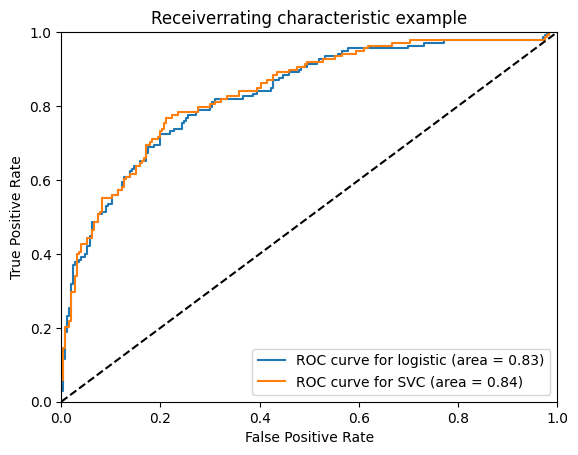

In [7]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [8]:
import pandas as pd

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

        fpr1      tpr1    1-fpr1       tf1  thresholds1
67  0.247967  0.753623  0.752033  0.001591     0.301941
        fpr2      tpr2    1-fpr2      tf2  thresholds2
68  0.223577  0.775362  0.776423 -0.00106      0.32106


In [9]:
roc1.head(71)

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.000000,1.000000,-1.000000,inf
1,0.000000,0.007246,1.000000,-0.992754,0.971918
2,0.000000,0.028986,1.000000,-0.971014,0.938015
3,0.004065,0.028986,0.995935,-0.966949,0.918496
4,0.004065,0.115942,0.995935,-0.879993,0.857188
...,...,...,...,...,...
66,0.243902,0.753623,0.756098,-0.002474,0.305992
67,0.247967,0.753623,0.752033,0.001591,0.301941
68,0.247967,0.760870,0.752033,0.008837,0.301723
69,0.252033,0.760870,0.747967,0.012902,0.299367


In [ ]:
roc2.head(71)

,fpr2,tpr2,1-fpr2,tf2,thresholds2
0,0.000000,0.000000,1.000000,-1.000000,1.420387
1,0.004065,0.000000,0.995935,-0.995935,0.420387
2,0.032520,0.000000,0.967480,-0.967480,0.361117
3,0.032520,0.007246,0.967480,-0.960233,0.360006
4,0.052846,0.007246,0.947154,-0.939908,0.349660
5,0.052846,0.014493,0.947154,-0.932662,0.348817
6,0.085366,0.014493,0.914634,-0.900141,0.342923
7,0.085366,0.021739,0.914634,-0.892895,0.342873
8,0.089431,0.021739,0.910569,-0.888830,0.342701
9,0.089431,0.028986,0.910569,-0.881584,0.342425
